# Bias-Variance Tradeoff - Overfitting vs. Underfitting the data

În partea trecută am văzut că acel model de Polynomial Regression este mai bun decât cel de Linear Regression. Acum apare întrebarea cum anume putem alege cei mai buni parametrii pentru un model? Următorul pas ar fi de a alege cei mai buni parametrii pentru un anumit model. Momentan nu putem modifica ceva la modelul de Linear Regression, dar putem modifica nivelul ecuației pentru acel Polynomial Feature (ecuație de gradul 2, 3, 4, 5, etc.) Cum anume se decide care este cel mai bun grad pentru ecuația respectivă

Aici intră în discuție partea de Bias-Variance Tradeofff (sau Overfitting vs. Underfitting). Acest concept este extrem de important pentru toți algoritmii  din categoria de Supervised din Machine Learning. Ce anume înseamnă asta?

Am văzut că un model de Polynomial Regression are o performanță mai bună decât un model de Linear Regression. Cum anume decidem gradul ecuației respective? Alegem o ecuație de gradul 2, 3, 4? Ce ne oprește să mergem până la o ecuație care are un grad extrem de mare? La ce trebuie să ne așteptăm atunci când creștem complexitatea unui model?

În general. creșterea complexității unui model de Machine Learning conduce la ceea ce se numește Bias-Variance Tradeoff. Dorim să avem un model care are o performanță bună pe datele pe care nu le-a văzut, dar dorim să ca acest model să recunoască anumite pattern-uri pe datele pe care a fost antrenat. Un bias sau variance mare pot duce la creare de modele greșite, care au o performanță mai slabă. Aceste concepte se pot vizualiza prin considerentul cum că un model face Overfit (varainace mare )la date sau Underfit (bias mare).

### Overfitting

În situația de overfit, modelul antrenează (fit) prea mult zgomot (noise) din datele pe care le primește. În acest caz se produc erori mici pe datele de antrenare, dar erori mari pentru datele de testare sau validare. Din cauza asta de cele mai multe ori este extrem de greu să ne dăm seama că un anumit model face Overfit la date, deoarece are o performanță extrem de bună la datele de antrenare.

<img src='../SS/good_fit.png'>

Să presupunem că avem situația de mai sus unde avem un model care face fit la datele respective. Linia respectivă este una bună pentru datele respective, iar atunci când se primesc noi date, teoretic modelul o să generalizeze bine noile instanțe și o să facă predicții bune. Ce anume se întâmplă atunci când modelul face Overfit la date? În acest caz, atunci graph-ul o să arate ceva de genul:

<img src='../SS/overfit.png'>

Atunci când un model face overfit, atunci un model o să ia prea mult zgomot (noise) din datele de antrenare și o să facă overfit la date. Care este totuși eroarea pentru acest caz? Din moment ce atinge aparoape fiecare punct din acel graph, eroarea este aproape de 0. Din cauza asta este foarte greu de a prezice dacă un model face overfit la date, deoarece putem crede doar că are o performanță extrem de bună. În momentul în care se primesc date noi, atunci o să avem o eroare mare, însă eroarea aceasta o să apară doar pe datele de testare sau atunci când este în producție, ceea ce nu este bine.

Din aceste cauze este bine să folosim concepte precum Cross validation (peste care o să ne utiăm în viitor), să împărțim și mai mult setul de date cu care se lucrează pentru a avea și un set de validare sau să aruncăm o privire peste erorile pentru datele de antrenare și peste erorile din datele de testare.

## Underfitting

Opusul acestui comportament este reprezentat de Underfitting. Acest comportament apare atunci când un model nu face fit bine la setul de date pe care este antrenat și este de obicei rezultatul unui model prea simplu. Graficul pentru Underfit arată ceva de genul:

<img src='../SS/underfit.png'>

Undefitting = high bias/ low variance

Overfitting = low bias/ high variance

Comportamentul de Overfitting poate duce la performanțe slabe atât pentru datele de antrenare cât și pentru cele de testare. De obicei este mai ușor de identificat decât comportamentul de Overfitting.

Exemplele de mai sus se potrivesc doar când avem de lucru cu un singur feature din setul de date. Atunci când există un număr mai mare de features, această vizualizare nu este posibilă. Pentru a vedea dacă un model face Overfit sau Underfit la date, atunci trebuie să facem un plot între eroare rezultată și complexitatea modelului.

Ce înseamnă parte de complexitate a modelului? Atunci când un model este mai complex (pentru un Polynomial regression are o valoare mai mare pentru parametrul de degree, iar pentru un alt model atunci ne referim la partea de tunare a modelului prin hyperparametrii) eroarea ar trebuie să fie tot mai mică. Aceasta este situația cea mai dorită (pe măsură ce creștem gradul ecuației, eroarea o să scadă). Un model slab se comportă invers, atunci când se crește complexitatea, eroarea crește și ea. Să vedem comportamentul în cazul în care s-a împărțit setul de date în train set și test set

<img src='../SS/tradeoff.png'>

În situația de mai sus avem explicate cazurile de mai sus. Cu linia albastră este prezentată corelația dintre Error și Model Complexity. Un model ar trebui să aibă o eraore tot mai mică atunci când se crește complexitatea acestuia. Cu linia portocalie este reprezentată corelația dintre Error și Model Complexity pentru datele de testare. Până la linia punctată cu roșu avem un model care este bun, unde este cam aceași corelație între eroare și complexitate atât pe datele de antrenare, cât și pe cele de testare. După ce se trece de acea linie se poate observa că eraorea pentru datele de testare crește semnificativ, ceea ce înseamnă că modelul realizează un Overfit la date.

De multe ori acea diferență dintre eroare și model complexity pentru datele de testare va exista o explozie dintr-o dată pentru această corelație, nu o să fie o creștere graduală.

Acum că am înțeles ce anume reprezintă conceptul de Bias-Variance Tradeoff putem să ne întoarce la modelul nostru de Polynomial Regression și să modificăm complexitatea acestui algoritm (adică să modificăm gradul ecuației). O să vedem cum anume putem să alegem complexitatea optimă pentru acest model și o să facem asta prin vizulizarea măsurării corelației dintre complexitatea modelului și eroare care o retunrează acel model. O să trebuiască să ne uităm peste această eroare atât pentru datele de antrenare cât și pentru cele de testare pentru a verifica dacă modelul face un Overfit la date sau nu.

Să refacem din nou acel model de Polynomial Regression

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the date into a DataFrame
df = pd.read_csv('../data/08-Linear-Regression-Models/Advertising.csv')

In [3]:
# printing the head of the data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Separating the Features from labels
X = df.drop(columns='sales')
y = df['sales']

In [6]:
# importing the methods needed from sklearn to create a Polynomial Feature
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# create an instance of the PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [12]:
# Fit and transform the data
polynomial_features = polynomial_converter.fit_transform(X)

In [9]:
polynomial_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
# importing the methods needed from sklearn to create a model, train the model and evaluate the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
# creating an instance of the model
model = LinearRegression()

In [13]:
# split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

In [14]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# making predictions
y_pred = model.predict(X_test)

In [16]:
# evaluating the model
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [17]:
# printing the errors metrics
print(f'MAE = {MAE}')
print(f'MSE = {MSE}')
print(f'RMSE = {RMSE}')

MAE = 0.48967980448037
MSE = 0.4417505510403648
RMSE = 0.6646431757269196


Întrebarea este dacă avem cum să îmbunătățim performanța acestui model dacă se crește gradul ecuației pentru PolynomialFeatures

Putem să creem o buclă pentru fiecare grad al ecuație pe care îl dorim, să antrenăm datele respective, să calculăm eroarile pentru setul de date de antrenare și test și să vedem unde anume începe partea de Overfit la date. Care sunt pașii pentru această buclă?

- crearea a diferite graduri pentru ecuația respectivă

- împărțirea datelor rezultate după transformare în train-test

- antrenarea modelului pe datele de antrenare

- salvăm erorile pentru train set și test set

- afișăm rezultatele

In [18]:
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1, 10):

    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

Ce anume am făcut în bucla de mai sus, am creat features cu o ecuație polynomială de un anumit grad, am împărțit datele în train_test, creat un model, am făcut predicții atât pentru datele de antrenare cât și pentru cele de test și am salvat erorile (RMSE) pentru acele predicții. Acum putem să vizualizăm erorile pentru fiecare grad de ecuație în parte

In [19]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088462,
 0.1426544837726474,
 0.16675345956185658]

Se poate observa că eroare de RMSE pentru datele de antrenare tot scade pe măsură ce crește gradul ecuației (cu excepție pentru acea valoare extrem de mare). În teorie, cu cât complexitatea crește, eroarea scade. valoarea aceea extrem de mare ne indică faptul că după acea valoare de obicei există un Overfit la date. Acest lucru se obseră și mai bine în cazul erorilor pentru setul de testare.

In [20]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.404068580479,
 4449.568027403435,
 95893.02658330933]

În cazul acestor erori (care sunt pentru datele de testare) se poate observa că de la un anumit punct eroarea (RMSE) este extrem de mare, iar eroarea pentru datele de antrenare a fost super mică, ceea ce înseamnă că modelul a făcut un Overfit la date (este prea complex pentru datele pe care le avem)

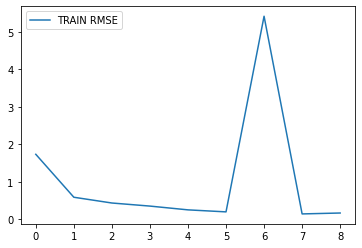

In [21]:
plt.plot(train_rmse_errors, label='TRAIN RMSE')
plt.legend()

Putem să facem un graph doar pentru primele 6 valori din acea listăm deoarece vedem că există acea diferență extremă între acele valori. Din acel moment știm că acele date nu ne sunt de folos

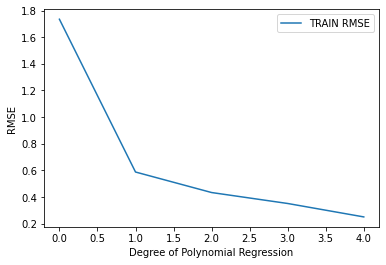

In [24]:
plt.plot(train_rmse_errors[:5], label='TRAIN RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial Regression')
plt.legend()

Peste acest plot putem să mai adăugăm și datele pentru eroarea rezultată din predicțiile de pe datele de test

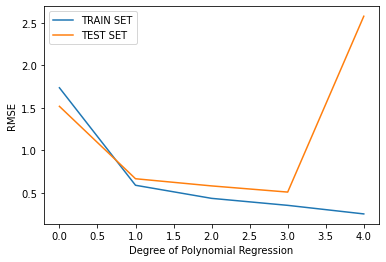

In [25]:
plt.plot(train_rmse_errors[:5], label='TRAIN SET')
plt.plot(test_rmse_errors[:5], label='TEST SET')
plt.xlabel('Degree of Polynomial Regression')
plt.ylabel('RMSE')

plt.legend()

Ceea ce nu este corect la acel grafic este faptul că începe de la 0, pe când gradul unei ecuații începe de la valoarea 1. Unde este valoarea 1.0 la Degree of Polynomial Regression acolo defapt este o ecuațue de gradul 2. Să modificăm acest lucru.

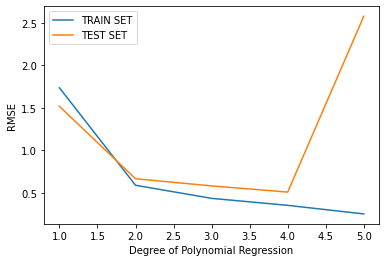

In [29]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN SET')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST SET')
plt.xlabel('Degree of Polynomial Regression')
plt.ylabel('RMSE')

plt.legend()

Se poate observa că atunci când se ajunge la o ecuație de gradul 4, RMSE începe să explodeze, ceea ce înseamnă un Overfit de date. Deoarece ecuația de gradul 4 se găsește chiar la limita aceea unde se face acea diferență între un model bun și unul care face overfit, s-ar recomanda să nu meargă până acolo cu complexitatea, ecuației, mai ales dacă diferența este așa de mare. În cazul de față se poate merge cu o ecuație de gradul 2 sau 3 (ecuația de gradul 3 are valori mai bune la partea de evaluare, dar complexitatea unei astfel de ecuații este mult mai mare față de o ecuație de gradul 2). Alegerea complexității ține foarte mult și de cunoștințele din domeniu de unde vin datele pe care se creează acest model. 

## Recapitulare

În cadrul acestei părți am aflat următoarele lucruri:

    1. Ce reprezintă conceptul de Bias-Variance Tradeoff
    
        High bias/ low variance = Underfitting

        Low bias/ high variance = Overfitting

    2. Ce reprezintă Overfitting the data

        Atunci când un model performează bine pe datele de antrenare, dar prost pe cele de testare. Apare atunci când se alege un model prea complex pentru datele cu care se lucrează 

    3. Ce reprezintă Underfitting the data

        Acest comportament apare atunci când modelul performează slab atât pe datele de antrenare cât și pe cele de testare. Apare atunci când complexitatea unui model este prea scăzută

    4. Cum se poate afla dacă un model face Underfit sau Overfit la date?

        Trebuie să verificăm RMSE atât pentru datele de antrenare cât și pentru datele de testare. Pentru asta trebuie făcute predicții pentru ambele seturi de date și calculate RMSE pentru fiecare set de predicții

        Overfit apare atunci când eroarea pentru datele de antrenare este foarte mică, dar pentru datele de testare este mare